# **TRABALHO PRÁTICO DE INTRODUÇÃO À INTELIGÊNCIA ARTIFICIAL**


# **APRENDIZAGEM SUPERVISIONADA: CLASSIFICAÇÃO**


Este projeto tem por objetivo desenvolver um algoritmo de Machine Learning para prever a tendência de uma pessoa desenvolver algum tipo de doença cardíaca com base em alguns fatores clínicos e laboratoriais.

Os dados foram extraídos do site do Kaggle:

https://www.kaggle.com/fedesoriano/heart-failure-prediction/version/1

# **PRÉ-PROCESSAMENTO**

In [13]:
import numpy as np
import pandas as pd

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
df = pd.read_csv('/content/drive/MyDrive/Projeto de IA/heart_tratado.csv',
                    sep=';', encoding='utf-8')

In [16]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0


In [17]:
df.shape

(917, 12)

In [18]:
df.dtypes

,0
Age,int64
Sex,object
ChestPainType,object
RestingBP,int64
Cholesterol,float64
FastingBS,int64
RestingECG,object
MaxHR,int64
ExerciseAngina,object
Oldpeak,float64


## **Transformando as variáveis categóricas nominais em variáveis categóricas ordinais**

In [19]:
df2 = pd.DataFrame.copy(df)

In [20]:
df2['Sex'].replace({'M':0, 'F': 1}, inplace=True)
df2['ChestPainType'].replace({'TA':0, 'ATA': 1, 'NAP':2, 'ASY': 3}, inplace=True)
df2['RestingECG'].replace({'Normal':0, 'ST': 1, 'LVH':2}, inplace=True)
df2['ExerciseAngina'].replace({'N':0, 'Y': 1}, inplace=True)
df2['ST_Slope'].replace({'Up':0, 'Flat': 1, 'Down':2}, inplace=True)

<ipython-input-20-c73592bd2c9c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['Sex'].replace({'M':0, 'F': 1}, inplace=True)
<ipython-input-20-c73592bd2c9c>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['Sex'].replace({'M':0, 'F': 1}, inplace=True)
<ipython-input-20-c73592bd2c9c>:2: Fut

In [21]:
df2.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,1,140,289.0,0,0,172,0,0.0,0,0
1,49,1,2,160,180.0,0,0,156,0,1.0,1,1
2,37,0,1,130,283.0,0,1,98,0,0.0,0,0
3,48,1,3,138,214.0,0,0,108,1,1.5,1,1
4,54,0,2,150,195.0,0,0,122,0,0.0,0,0


In [22]:
df2.dtypes

,0
Age,int64
Sex,int64
ChestPainType,int64
RestingBP,int64
Cholesterol,float64
FastingBS,int64
RestingECG,int64
MaxHR,int64
ExerciseAngina,int64
Oldpeak,float64


In [23]:
df2.shape

(917, 12)

## **LEGENDA**

Age = idade (anos)

Sex = sexo (0=M; 1=F)

Chest Pain Type = tipo de dor no peito (0=TA:angina típica; 1=ATA:angina atípica; 2=NAP:dor não anginosa; 3=ASY:assintomático)

Resting BP = pressão sanguínea em repouso (mmHg)

Cholesterol = colesterol sérico (mg/dl)

Fasting BS = açúcar no sangue em jejum (mg/dl)
          0: Fasting BS < 120 mg/dl (não diabético)
          1: Fasting BS >= 120 mg/dl, (diabético)

Resting ECG = eletrocardiograma em repouso (0=Normal; 1=ST:Anormalidade da onda ST-T; 2=LVH: Hipertrofia ventricular esquerda)

Max HR = frequência cardíaca máxima

Exercise Angina = Angina induzida por exercício (0=Não; 1=Sim)

Old Peak = Depressão de ST induzida por exercício em relação ao repouso

ST_Slope = Inclinação do segmento ST (0=UP; 1=Flat; 2=Down)

Heart Disease = Doença cardíaca (0=Não possui doença cardíaca; 1=Possui doença cardíaca)



## **ATRIBUTOS PREVISORES E ALVO**

In [24]:
df2.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,1,140,289.0,0,0,172,0,0.0,0,0
1,49,1,2,160,180.0,0,0,156,0,1.0,1,1
2,37,0,1,130,283.0,0,1,98,0,0.0,0,0
3,48,1,3,138,214.0,0,0,108,1,1.5,1,1
4,54,0,2,150,195.0,0,0,122,0,0.0,0,0


In [25]:
previsores = df2.iloc[:, 0:11].values


In [26]:
previsores

array([[40. ,  0. ,  1. , ...,  0. ,  0. ,  0. ],
       [49. ,  1. ,  2. , ...,  0. ,  1. ,  1. ],
       [37. ,  0. ,  1. , ...,  0. ,  0. ,  0. ],
       ...,
       [57. ,  0. ,  3. , ...,  1. ,  1.2,  1. ],
       [57. ,  1. ,  1. , ...,  0. ,  0. ,  1. ],
       [38. ,  0. ,  2. , ...,  0. ,  0. ,  0. ]])

In [27]:
previsores.shape

(917, 11)

In [28]:
alvo = df2.iloc[:, 11].values

In [29]:
alvo

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [30]:
alvo.shape

(917,)

## **Análise das escalas dos atributos (Escalonamento)**

In [31]:
df2.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.00000,917.000000
mean,53.509269,0.210469,2.251908,132.540894,244.635389,0.233370,0.604144,136.789531,0.404580,0.886696,0.63795,0.552890
std,9.437636,0.407864,0.931502,17.999749,53.347125,0.423206,0.806161,25.467129,0.491078,1.066960,0.60727,0.497466
min,28.000000,0.000000,0.000000,80.000000,85.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.00000,0.000000
25%,47.000000,0.000000,2.000000,120.000000,214.000000,0.000000,0.000000,120.000000,0.000000,0.000000,0.00000,0.000000
50%,54.000000,0.000000,3.000000,130.000000,244.635389,0.000000,0.000000,138.000000,0.000000,0.600000,1.00000,1.000000
75%,60.000000,0.000000,3.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,1.00000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.00000,1.000000


Padronização (utiliza a média e o desvio padrão como referência).

Normalização (utiliza os valores máximo e mínimo como referência).

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
previsores_esc = StandardScaler().fit_transform(previsores)

In [34]:
previsores_esc

array([[-1.43220634, -0.51630861, -1.34470119, ..., -0.82431012,
        -0.83150225, -1.05109458],
       [-0.47805725,  1.9368261 , -0.27058012, ..., -0.82431012,
         0.10625149,  0.59651863],
       [-1.75025603, -0.51630861, -1.34470119, ..., -0.82431012,
        -0.83150225, -1.05109458],
       ...,
       [ 0.37007527, -0.51630861,  0.80354095, ...,  1.21313565,
         0.29380223,  0.59651863],
       [ 0.37007527,  1.9368261 , -1.34470119, ..., -0.82431012,
        -0.83150225,  0.59651863],
       [-1.64423947, -0.51630861, -0.27058012, ..., -0.82431012,
        -0.83150225, -1.05109458]])

In [35]:
previsoresdf = pd.DataFrame(previsores_esc)
previsoresdf

,0,1,2,3,4,5,6,7,8,9,10
0,-1.432206,-0.516309,-1.344701,0.414627,0.832075,-0.551733,-0.749818,1.383339,-0.824310,-0.831502,-1.051095
1,-0.478057,1.936826,-0.270580,1.526360,-1.212261,-0.551733,-0.749818,0.754736,-0.824310,0.106251,0.596519
2,-1.750256,-0.516309,-1.344701,-0.141240,0.719543,-0.551733,0.491306,-1.523953,-0.824310,-0.831502,-1.051095
3,-0.584074,1.936826,0.803541,0.303453,-0.574578,-0.551733,-0.749818,-1.131075,1.213136,0.575128,0.596519
4,0.052026,-0.516309,-0.270580,0.970493,-0.930931,-0.551733,-0.749818,-0.581047,-0.824310,-0.831502,-1.051095
...,...,...,...,...,...,...,...,...,...,...,...
912,-0.902124,-0.516309,-2.418822,-1.252973,0.363191,-0.551733,-0.749818,-0.188170,-0.824310,0.293802,0.596519
913,1.536257,-0.516309,0.803541,0.636973,-0.968441,1.812470,-0.749818,0.165420,-0.824310,2.356860,0.596519
914,0.370075,-0.516309,0.803541,-0.141240,-2.131275,-0.551733,-0.749818,-0.856061,1.213136,0.293802,0.596519
915,0.370075,1.936826,-1.344701,-0.141240,-0.161960,-0.551733,1.732430,1.461915,-0.824310,-0.831502,0.596519


In [36]:
previsoresdf.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,917.000000,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02
mean,1.859654e-16,7.748558e-18,1.046055e-16,7.767929e-16,-1.869340e-16,4.649135e-17,0.000000,-5.114048e-16,-1.046055e-16,7.748558e-17,-3.874279e-17
std,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00
min,-2.704405e+00,-5.163086e-01,-2.418822e+00,-2.920572e+00,-2.994023e+00,-5.517333e-01,-0.749818,-3.016886e+00,-8.243101e-01,-3.269662e+00,-1.051095e+00
25%,-6.900904e-01,-5.163086e-01,-2.705801e-01,-6.971063e-01,-5.745784e-01,-5.517333e-01,-0.749818,-6.596226e-01,-8.243101e-01,-8.315022e-01,-1.051095e+00
50%,5.202558e-02,-5.163086e-01,8.035410e-01,-1.412398e-01,0.000000e+00,-5.517333e-01,-0.749818,4.755658e-02,-8.243101e-01,-2.688500e-01,5.965186e-01
75%,6.881250e-01,-5.163086e-01,8.035410e-01,4.146267e-01,4.194568e-01,-5.517333e-01,0.491306,7.547357e-01,1.213136e+00,5.751284e-01,5.965186e-01
max,2.490407e+00,1.936826e+00,8.035410e-01,3.749826e+00,6.721265e+00,1.812470e+00,1.732430,2.561971e+00,1.213136e+00,4.982571e+00,2.244132e+00


## **Codificação de variáveis categóricas**

### **LabelEncoder: transformação de variáveis categóricas em numéricas**


In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0


In [39]:
previsores2 = df.iloc[:, 0:11].values
previsores2

array([[40, 'M', 'ATA', ..., 'N', 0.0, 'Up'],
       [49, 'F', 'NAP', ..., 'N', 1.0, 'Flat'],
       [37, 'M', 'ATA', ..., 'N', 0.0, 'Up'],
       ...,
       [57, 'M', 'ASY', ..., 'Y', 1.2, 'Flat'],
       [57, 'F', 'ATA', ..., 'N', 0.0, 'Flat'],
       [38, 'M', 'NAP', ..., 'N', 0.0, 'Up']], dtype=object)

In [40]:
previsores2[:,1] = LabelEncoder().fit_transform(previsores2[:,1])

In [41]:
previsores2

array([[40, 1, 'ATA', ..., 'N', 0.0, 'Up'],
       [49, 0, 'NAP', ..., 'N', 1.0, 'Flat'],
       [37, 1, 'ATA', ..., 'N', 0.0, 'Up'],
       ...,
       [57, 1, 'ASY', ..., 'Y', 1.2, 'Flat'],
       [57, 0, 'ATA', ..., 'N', 0.0, 'Flat'],
       [38, 1, 'NAP', ..., 'N', 0.0, 'Up']], dtype=object)

In [42]:
previsores2[:,2] = LabelEncoder().fit_transform(previsores2[:,2])
previsores2[:,6] = LabelEncoder().fit_transform(previsores2[:,6])
previsores2[:,8] = LabelEncoder().fit_transform(previsores2[:,8])
previsores2[:,10] = LabelEncoder().fit_transform(previsores2[:,10])

In [43]:
previsores2

array([[40, 1, 1, ..., 0, 0.0, 2],
       [49, 0, 2, ..., 0, 1.0, 1],
       [37, 1, 1, ..., 0, 0.0, 2],
       ...,
       [57, 1, 0, ..., 1, 1.2, 1],
       [57, 0, 1, ..., 0, 0.0, 1],
       [38, 1, 2, ..., 0, 0.0, 2]], dtype=object)

In [44]:
previsores2.shape

(917, 11)

### **OneHotEncoder: Criação de variáveis Dummy (fictícia).**

Cuidado com a multicolinearidade (variáveis altamente correlacionadas entre si).

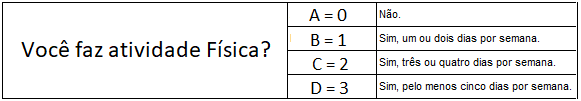

A   B   C   D   
1   0   0   0   
0   1   0   0   
0   0   1   0   
0   0   0   1


In [45]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [46]:
ColumnTransformer?

Parâmetros ColumnTransformer
- name: nome dado a transformação.
- transformer: tipo de estimador (OneHotEncoder).
- columns: colunas que serão transformadas.
- remainder: o que acontecerá com o restante das colunas não relacionadas:
1) drop = exclui as outras colunas.
2) passthrough = mantém as outras colunas. drop é default.  
- sparse_threshold: parâmetro de classificação de matrizes esparsas. default é 0.3
- n_jobs: número de trabalhos a serem executados em paralelo. default é nenhum
- transformer_weights: definição de pesos aos transformadores.
-verbose: default é False. se for True a execução é apresentada na tela.

In [47]:
previsores3 = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1,2,6,8,10])],
                                remainder='passthrough').fit_transform(previsores2)

In [48]:
previsores3

array([[0.0, 1.0, 0.0, ..., 0, 172, 0.0],
       [1.0, 0.0, 0.0, ..., 0, 156, 1.0],
       [0.0, 1.0, 0.0, ..., 0, 98, 0.0],
       ...,
       [0.0, 1.0, 1.0, ..., 0, 115, 1.2],
       [1.0, 0.0, 0.0, ..., 0, 174, 0.0],
       [0.0, 1.0, 0.0, ..., 0, 173, 0.0]], dtype=object)

In [49]:
previsores3.shape

(917, 20)

In [50]:
previsores3df = pd.DataFrame(previsores3)
previsores3df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,40,140,289.0,0,172,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,49,160,180.0,0,156,1.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,37,130,283.0,0,98,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,48,138,214.0,0,108,1.5
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,54,150,195.0,0,122,0.0


In [51]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0


## **Escalonamento**

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
previsores3_esc = StandardScaler().fit_transform(previsores3)

In [54]:
previsores3_esc

array([[-0.51630861,  0.51630861, -1.08542493, ..., -0.55173333,
         1.38333943, -0.83150225],
       [ 1.9368261 , -1.9368261 , -1.08542493, ..., -0.55173333,
         0.75473573,  0.10625149],
       [-0.51630861,  0.51630861, -1.08542493, ..., -0.55173333,
        -1.52395266, -0.83150225],
       ...,
       [-0.51630861,  0.51630861,  0.92129817, ..., -0.55173333,
        -0.85606123,  0.29380223],
       [ 1.9368261 , -1.9368261 , -1.08542493, ..., -0.55173333,
         1.46191489, -0.83150225],
       [-0.51630861,  0.51630861, -1.08542493, ..., -0.55173333,
         1.42262716, -0.83150225]])

In [55]:
previsores3df = pd.DataFrame(previsores3_esc)
previsores3df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.516309,0.516309,-1.085425,2.073784,-0.531524,-0.229810,-0.507826,0.815013,-0.490781,0.824310,-0.824310,-0.271607,-1.001091,1.149573,-1.432206,0.414627,0.832075,-0.551733,1.383339,-0.831502
1,1.936826,-1.936826,-1.085425,-0.482210,1.881384,-0.229810,-0.507826,0.815013,-0.490781,0.824310,-0.824310,-0.271607,0.998910,-0.869888,-0.478057,1.526360,-1.212261,-0.551733,0.754736,0.106251
2,-0.516309,0.516309,-1.085425,2.073784,-0.531524,-0.229810,-0.507826,-1.226974,2.037569,0.824310,-0.824310,-0.271607,-1.001091,1.149573,-1.750256,-0.141240,0.719543,-0.551733,-1.523953,-0.831502
3,1.936826,-1.936826,0.921298,-0.482210,-0.531524,-0.229810,-0.507826,0.815013,-0.490781,-1.213136,1.213136,-0.271607,0.998910,-0.869888,-0.584074,0.303453,-0.574578,-0.551733,-1.131075,0.575128
4,-0.516309,0.516309,-1.085425,-0.482210,1.881384,-0.229810,-0.507826,0.815013,-0.490781,0.824310,-0.824310,-0.271607,-1.001091,1.149573,0.052026,0.970493,-0.930931,-0.551733,-0.581047,-0.831502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,-0.516309,0.516309,-1.085425,-0.482210,-0.531524,4.351412,-0.507826,0.815013,-0.490781,0.824310,-0.824310,-0.271607,0.998910,-0.869888,-0.902124,-1.252973,0.363191,-0.551733,-0.188170,0.293802
913,-0.516309,0.516309,0.921298,-0.482210,-0.531524,-0.229810,-0.507826,0.815013,-0.490781,0.824310,-0.824310,-0.271607,0.998910,-0.869888,1.536257,0.636973,-0.968441,1.812470,0.165420,2.356860
914,-0.516309,0.516309,0.921298,-0.482210,-0.531524,-0.229810,-0.507826,0.815013,-0.490781,-1.213136,1.213136,-0.271607,0.998910,-0.869888,0.370075,-0.141240,-2.131275,-0.551733,-0.856061,0.293802
915,1.936826,-1.936826,-1.085425,2.073784,-0.531524,-0.229810,1.969177,-1.226974,-0.490781,0.824310,-0.824310,-0.271607,0.998910,-0.869888,0.370075,-0.141240,-0.161960,-0.551733,1.461915,-0.831502


In [56]:
previsores3df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,917.000000,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,917.000000,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02
mean,1.084798e-16,-1.472226e-16,1.937139e-17,-3.874279e-17,3.874279e-17,6.973702e-17,0.000000,-9.298269e-17,1.549712e-17,-4.261707e-17,4.261707e-17,8.523413e-17,0.000000,-3.874279e-17,1.859654e-16,7.884157e-16,3.014189e-15,-1.549712e-17,-5.114048e-16,-1.859654e-16
std,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00
min,-5.163086e-01,-1.936826e+00,-1.085425e+00,-4.822104e-01,-5.315237e-01,-2.298105e-01,-0.507826,-1.226974e+00,-4.907810e-01,-1.213136e+00,-8.243101e-01,-2.716072e-01,-1.001091,-8.698879e-01,-2.704405e+00,-2.920572e+00,-2.994023e+00,-5.517333e-01,-3.016886e+00,-3.269662e+00
25%,-5.163086e-01,5.163086e-01,-1.085425e+00,-4.822104e-01,-5.315237e-01,-2.298105e-01,-0.507826,-1.226974e+00,-4.907810e-01,-1.213136e+00,-8.243101e-01,-2.716072e-01,-1.001091,-8.698879e-01,-6.900904e-01,-6.971063e-01,-5.745784e-01,-5.517333e-01,-6.596226e-01,-8.315022e-01
50%,-5.163086e-01,5.163086e-01,9.212982e-01,-4.822104e-01,-5.315237e-01,-2.298105e-01,-0.507826,8.150134e-01,-4.907810e-01,8.243101e-01,-8.243101e-01,-2.716072e-01,0.998910,-8.698879e-01,5.202558e-02,-1.412398e-01,3.198360e-15,-5.517333e-01,4.755658e-02,-2.688500e-01
75%,-5.163086e-01,5.163086e-01,9.212982e-01,-4.822104e-01,-5.315237e-01,-2.298105e-01,-0.507826,8.150134e-01,-4.907810e-01,8.243101e-01,1.213136e+00,-2.716072e-01,0.998910,1.149573e+00,6.881250e-01,4.146267e-01,4.194568e-01,-5.517333e-01,7.547357e-01,5.751284e-01
max,1.936826e+00,5.163086e-01,9.212982e-01,2.073784e+00,1.881384e+00,4.351412e+00,1.969177,8.150134e-01,2.037569e+00,8.243101e-01,1.213136e+00,3.681787e+00,0.998910,1.149573e+00,2.490407e+00,3.749826e+00,6.721265e+00,1.812470e+00,2.561971e+00,4.982571e+00


## **RESUMO PRÉ-PROCESSAMENTO**

alvo = variável que se pretende atingir (tem ou não doença cardíaca).

previsores = conjunto de variáveis previsoras com as variáveis categóricas transformadas em numéricas manualmente, sem escalonar.

previsores_esc = conjunto de variáveis previsoras com as variáveis categóricas transformadas em numéricas, escalonada.

previsores2 = conjunto de variáveis previsoras com as variáveis categóricas transformadas em numéricas pelo labelencoder.

previsores3 = conjunto de variáveis previsoras transformadas pelo labelencoder e onehotencoder, sem escalonar.

previsores3_esc = conjunto de variáveis previsoras transformadas pelo labelencoder e onehotencoder escalonada.

## **Redução de dimensionalidade**

Objetivo é selecionar os melhores componentes (atributos) para treinamento do algoritmo, através da análise das correlações entre as variáveis.

### Análise dos Componentes Principais (PCA)

**Seleção de características:** seleciona os melhores atributos e utiliza sem transformações.

**Extração de Características:** Encontra os relacionamentos dos melhores atributos e cria novos atributos.

É um algoritmo de aprendizagem não supervisionada.

Aplica-se em dados linearmente separáveis.

In [57]:
from sklearn.decomposition import PCA

In [58]:
pca = PCA(n_components=3)

In [59]:
previsores_pca = pca.fit_transform(previsores2)

In [60]:
previsores_pca.shape

(917, 3)

In [61]:
# Componentes principais
previsores_pca

array([[  44.01218603,   36.15137592,   10.64727631],
       [ -63.9918455 ,   13.93849233,   31.69212503],
       [  38.53844277,  -33.91712222,  -12.48837374],
       ...,
       [-113.3467467 ,  -23.48595247,   -2.51064362],
       [  -9.1141306 ,   35.90083188,    4.81814643],
       [ -70.01342608,   35.68741686,   12.10984845]])

In [62]:
# razão das variáveis explicativas
pca.explained_variance_ratio_

array([0.72847929, 0.17183534, 0.08122019])

In [63]:
# Soma das variáveis explicativas
pca.explained_variance_ratio_.sum()

np.float64(0.9815348236774059)

### Kernel PCA

É um algoritmo de aprendizagem não supervisionada.

Aplica-se também em dados linearmente não separáveis.

In [64]:
from sklearn.decomposition import KernelPCA

In [65]:
kpca = KernelPCA(n_components=4, kernel='rbf')

In [66]:
previsores_kernel = kpca.fit_transform(previsores2)

In [67]:
previsores_kernel.shape

(917, 4)

In [68]:
previsores_kernel

array([[-0.00249772, -0.00290225, -0.0027372 , -0.00191636],
       [-0.00249877, -0.00290359, -0.00273854, -0.00191743],
       [-0.00249785, -0.00290241, -0.00273736, -0.00191649],
       ...,
       [-0.00249774, -0.00290227, -0.00273723, -0.00191638],
       [-0.00249793, -0.00290252, -0.00273748, -0.00191659],
       [-0.00249772, -0.00290225, -0.0027372 , -0.00191637]])

### **Análise do Discriminante Linear (LDA: Linear Discriminant Analysis)**

Algoritmo de aprendizagem supervisionada, pois utiliza a classe como referência para seleção.

Aplicado em situações com muitos atributos previsores e também com o atributo alvo com muitas classes.

In [69]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components = 1)

In [70]:
previsores_lda = lda.fit_transform(previsores2, alvo)

In [71]:
previsores_lda

array([[-1.47297727],
       [-1.41360735],
       [-0.96705302],
       [ 0.53331037],
       [-1.45783427],
       [-1.78559221],
       [-2.28906835],
       [-1.26844095],
       [ 1.03044735],
       [-1.8033219 ],
       [-2.56103248],
       [ 1.08833702],
       [-1.4298088 ],
       [ 1.02172609],
       [-2.51881925],
       [-0.75582909],
       [-0.27447783],
       [-2.33841952],
       [ 0.50562225],
       [ 0.03155735],
       [-2.89530718],
       [-0.23402029],
       [-2.26833719],
       [ 0.97019565],
       [-1.70998121],
       [-2.0730337 ],
       [ 1.62722174],
       [-0.96486408],
       [-1.52502126],
       [-1.33460621],
       [-0.03948873],
       [-1.44459749],
       [ 0.63936919],
       [ 0.34808635],
       [-2.23945383],
       [-1.48957548],
       [ 2.4746182 ],
       [-2.13691975],
       [-1.54252555],
       [ 0.30741381],
       [-1.8748176 ],
       [-0.26749988],
       [-1.51713745],
       [-1.79186716],
       [ 1.00348547],
       [ 0

In [72]:
lda.explained_variance_ratio_

array([1.])

## **Salvando as variáveis (atributos)**

In [73]:
import pickle

In [74]:
# Criando arquivo
arq1 = open('heart.pkl', 'wb')

In [75]:
# Salvando a variável no arquivo
pickle.dump(alvo, arq1)

In [76]:
# Fechando arquivo
arq1.close()

In [77]:
# Lendo arquivo
arq1 = open('heart.pkl', 'rb')

In [78]:
# Chamando a variável
alvo = pickle.load(arq1)

In [79]:
alvo

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [80]:
# Criando arquivos e Salvando as variáveis
arq2 = open('heart2.pkl', 'wb')
pickle.dump(previsores, arq2)
arq3 = open('heart3.pkl', 'wb')
pickle.dump(previsores_esc, arq3)
arq4 = open('heart4.pkl', 'wb')
pickle.dump(previsores2, arq4)
arq5 = open('heart5.pkl', 'wb')
pickle.dump(previsores3, arq5)
arq6 = open('heart6.pkl', 'wb')
pickle.dump(previsores3_esc, arq6)

In [81]:
arq2 = open('heart2.pkl', 'rb')

In [82]:
previsores = pickle.load(arq2)

In [83]:
previsores

array([[40. ,  0. ,  1. , ...,  0. ,  0. ,  0. ],
       [49. ,  1. ,  2. , ...,  0. ,  1. ,  1. ],
       [37. ,  0. ,  1. , ...,  0. ,  0. ,  0. ],
       ...,
       [57. ,  0. ,  3. , ...,  1. ,  1.2,  1. ],
       [57. ,  1. ,  1. , ...,  0. ,  0. ,  1. ],
       [38. ,  0. ,  2. , ...,  0. ,  0. ,  0. ]])

## **BASE DE TREINO E TESTE**

In [84]:
from sklearn.model_selection import train_test_split

Parâmetros train_test_split:   
- arrays: nomes dos atributos previsores e alvo.   
- test_size: tamanho em porcentagem dos dados de teste. default é none.   
- train_size: tamanho em porcentagem dos dados de treinamento.default é none.  
- random_state: nomeação de um estado aleatório.   
- shuffle: embaralhamento dos dados aleatórios. Associado com o random_state ocorre o mesmo embaralhamento sempre. Default é True.  
- stratify: Possibilidade de dividir os dados de forma estratificada. Default é None (nesse caso é mantido a proporção, isto é, se tem 30% de zeros e 70% de 1 no dataframe, na separação em treinamento e teste se manterá essa proporção).

In [85]:
x_treino, x_teste, y_treino, y_teste = train_test_split(previsores, alvo, test_size = 0.3, random_state = 0)

In [86]:
x_treino.shape

(641, 11)

In [87]:
x_teste.shape

(276, 11)

In [88]:
y_treino.shape

(641,)

In [89]:
y_teste.shape

(276,)

# **NAIVE BAYES**

https://scikit-learn.org/stable/modules/naive_bayes.html

Treinamento do algoritmo

In [90]:
from sklearn.naive_bayes import GaussianNB

In [91]:
naive = GaussianNB()
naive.fit(x_treino, y_treino)

GaussianNB()

Avaliação do algoritmo

In [92]:
previsoes_naive = naive.predict(x_teste)
previsoes_naive

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0])

In [93]:
y_teste

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1])

In [94]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [95]:
accuracy_score(y_teste, previsoes_naive)

0.8442028985507246

In [96]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_naive) * 100.0))

Acurácia: 84.42%


In [97]:
confusion_matrix(y_teste, previsoes_naive)

array([[102,  19],
       [ 24, 131]])

In [98]:
print(classification_report(y_teste, previsoes_naive))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83       121
           1       0.87      0.85      0.86       155

    accuracy                           0.84       276
   macro avg       0.84      0.84      0.84       276
weighted avg       0.85      0.84      0.84       276



**Análise dados de treino**

In [99]:
previsoes_treino = naive.predict(x_treino)
previsoes_treino

array([0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,

In [100]:
accuracy_score(y_treino, previsoes_treino)

0.8361934477379095

In [101]:
confusion_matrix(y_treino, previsoes_treino)

array([[243,  46],
       [ 59, 293]])

### **Validação Cruzada**

In [102]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [103]:
# Separando os dados em folds
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

In [104]:
# Criando o modelo
modelo = GaussianNB()
resultado = cross_val_score(modelo, previsores3_esc, alvo, cv = kfold)
resultado

array([0.87096774, 0.87096774, 0.90322581, 0.80645161, 0.77419355,
       0.90322581, 0.70967742, 0.87096774, 0.77419355, 0.87096774,
       0.90322581, 0.77419355, 0.93548387, 0.90322581, 0.87096774,
       0.87096774, 0.87096774, 0.93333333, 0.93333333, 0.9       ,
       0.76666667, 0.83333333, 0.8       , 0.7       , 0.83333333,
       0.93333333, 0.86666667, 0.9       , 0.86666667, 0.8       ])

In [105]:
# Usamos a média e o desvio padrão
print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0))

Acurácia Média: 85.17%


Naive Bayes = 84,78% (treino e teste) - 234 acertos e 85,17% (validação cruzada) - previsores3_esc





# **MÁQUINAS DE VETORES DE SUPORTE (SVM)**

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [106]:
from sklearn.svm import SVC

In [107]:
svm = SVC(kernel='linear', random_state=1, C = 2)
svm.fit(x_treino, y_treino)

SVC(C=2, kernel='linear', random_state=1)

In [108]:
previsoes_svm = svm.predict(x_teste)
previsoes_svm

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1])

In [109]:
y_teste

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1])

In [110]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [111]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_svm) * 100.0))

Acurácia: 84.42%


In [112]:
confusion_matrix(y_teste, previsoes_svm)

array([[ 99,  22],
       [ 21, 134]])

In [113]:
print(classification_report(y_teste, previsoes_svm))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       121
           1       0.86      0.86      0.86       155

    accuracy                           0.84       276
   macro avg       0.84      0.84      0.84       276
weighted avg       0.84      0.84      0.84       276



**Análise dados de treino**

In [114]:
previsoes_treino = svm.predict(x_treino)
previsoes_treino

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,

In [115]:
accuracy_score(y_treino, previsoes_treino)

0.859594383775351

In [116]:
confusion_matrix(y_treino, previsoes_treino)

array([[238,  51],
       [ 39, 313]])

### **Validação Cruzada**

In [117]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [118]:
# Separando os dados em folds
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

In [119]:
# Criando o modelo
modelo = SVC(kernel='rbf', random_state=1, C = 2)
resultado = cross_val_score(modelo, previsores3_esc, alvo, cv = kfold)

# Usamos a média e o desvio padrão
print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0))

Acurácia Média: 85.72%


Naive Bayes = 84,78% (treino e teste) - 234 acertos e 85,17% (validação cruzada) : previsores3_esc

SVM = 86,23% - 238 acertos e 85,72% (validação cruzada) : previsores3-esc - SVC(kernel='rbf', random_state=1, C = 2)



# **REGRESSÃO LOGÍSTICA**

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [120]:
from sklearn.linear_model import LogisticRegression

In [121]:
logistica = LogisticRegression(random_state=1, max_iter=500, penalty="l2",
                               tol=0.0001, C=1,solver="lbfgs")
logistica.fit(x_treino, y_treino)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1, max_iter=500, random_state=1)

In [122]:
logistica.intercept_

array([-3.24276597])

In [123]:
logistica.coef_

array([[ 0.01162257, -1.24038587,  0.66683788,  0.00311737,  0.00417312,
         0.85651973,  0.10676455, -0.01194595,  1.0320617 ,  0.27370442,
         1.62312961]])

In [124]:
previsoes_logistica = logistica.predict(x_teste)
previsoes_logistica

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1])

In [125]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [126]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_logistica) * 100.0))

Acurácia: 85.87%


In [127]:
confusion_matrix(y_teste, previsoes_logistica)

array([[ 99,  22],
       [ 17, 138]])

In [128]:
print(classification_report(y_teste, previsoes_logistica))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84       121
           1       0.86      0.89      0.88       155

    accuracy                           0.86       276
   macro avg       0.86      0.85      0.86       276
weighted avg       0.86      0.86      0.86       276



**Análise dados de treino**

In [129]:
previsoes_treino = logistica.predict(x_treino)
previsoes_treino

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,

In [130]:
accuracy_score(y_treino, previsoes_treino)

0.8502340093603744

In [131]:
confusion_matrix(y_treino, previsoes_treino)

array([[238,  51],
       [ 45, 307]])

### **Validação Cruzada**

In [132]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [133]:
# Separando os dados em folds
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

In [134]:
# Criando o modelo
modelo = LogisticRegression(random_state=1, max_iter=600, penalty="l2",
                               tol=0.0001, C=1,solver="lbfgs")
resultado = cross_val_score(modelo, previsores3_esc, alvo, cv = kfold)

# Usamos a média e o desvio padrão
print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0))

Acurácia Média: 85.83%


Naive Bayes = 84,78% (treino e teste) - 234 acertos e 85,17% (validação cruzada) : previsores3_esc

SVM = 86,23% - 238 acertos e 85,72% (validação cruzada) : previsores3-esc - SVC(kernel='rbf', random_state=1, C = 2)

Regressão logística = 86,23% - 238 acertos e 85,83% (validação cruzada) : previsores3_esc - LogisticRegression(random_state=1, max_iter=600, penalty="l2", tol=0.0001, C=1,solver="lbfgs")

# **APRENDIZAGEM BASEADA EM INSTÂNCIAS (KNN)**

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [135]:
from sklearn.neighbors import KNeighborsClassifier

In [136]:
knn = KNeighborsClassifier(n_neighbors=7, metric='minkowski', p=1)
knn.fit(x_treino, y_treino)

KNeighborsClassifier(n_neighbors=7, p=1)

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.DistanceMetric.html

In [137]:
previsoes_knn = knn.predict(x_teste)
previsoes_knn

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [138]:
y_teste

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1])

In [139]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [140]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_knn) * 100.0))

Acurácia: 69.93%


In [141]:
confusion_matrix(y_teste, previsoes_knn)

array([[ 76,  45],
       [ 38, 117]])

In [142]:
print(classification_report(y_teste, previsoes_knn))

              precision    recall  f1-score   support

           0       0.67      0.63      0.65       121
           1       0.72      0.75      0.74       155

    accuracy                           0.70       276
   macro avg       0.69      0.69      0.69       276
weighted avg       0.70      0.70      0.70       276



**Análise dados de treino**

In [143]:
previsoes_treino = knn.predict(x_treino)
previsoes_treino

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,

In [144]:
accuracy_score(y_treino, previsoes_treino)

0.7987519500780031

In [145]:
confusion_matrix(y_treino, previsoes_treino)

array([[210,  79],
       [ 50, 302]])

### **Validação Cruzada**

In [146]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [147]:
# Separando os dados em folds
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

In [148]:
# Criando o modelo
modelo = KNeighborsClassifier(n_neighbors=7, metric='minkowski', p = 1)
resultado = cross_val_score(modelo, previsores3_esc, alvo, cv = kfold)

# Usamos a média e o desvio padrão
print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0))

Acurácia Média: 85.84%


Naive Bayes = 84,78% (treino e teste) - 234 acertos e 85,17% (validação cruzada) : previsores3_esc

SVM = 86,23% - 238 acertos e 85,72% (validação cruzada) : previsores3-esc - SVC(kernel='rbf', random_state=1, C = 2)

Regressão logística = 86,23% - 238 acertos e 85,83% (validação cruzada) : previsores3_esc - LogisticRegression(random_state=1, max_iter=600, penalty="l2", tol=0.0001, C=1,solver="lbfgs")

KNN = 84,06% - 232 acertos e 85,84% (validação cruzada) : previsores3_esc ou previsores_esc - KNeighborsClassifier(n_neighbors=7, metric='minkowski', p = 1)



# **ÁRVORE DE DECISÃO**

https://scikit-learn.org/stable/modules/tree.html

In [149]:
from sklearn.tree import DecisionTreeClassifier

In [150]:
arvore = DecisionTreeClassifier(criterion='entropy', random_state = 0, max_depth=3)
arvore.fit(x_treino, y_treino)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [151]:
previsoes_arvore = arvore.predict(x_teste)
previsoes_arvore

array([1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1])

In [152]:
y_teste

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1])

In [153]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [154]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_arvore) * 100.0))

Acurácia: 83.70%


In [155]:
confusion_matrix(y_teste, previsoes_arvore)

array([[105,  16],
       [ 29, 126]])

In [156]:
print(classification_report(y_teste, previsoes_arvore))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       121
           1       0.89      0.81      0.85       155

    accuracy                           0.84       276
   macro avg       0.84      0.84      0.84       276
weighted avg       0.84      0.84      0.84       276



**Análise dados de treino**

In [157]:
previsoes_treino = arvore.predict(x_treino)
previsoes_treino

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,

In [158]:
accuracy_score(y_treino, previsoes_treino)

0.8517940717628705

In [159]:
confusion_matrix(y_treino, previsoes_treino)

array([[249,  40],
       [ 55, 297]])

### **Validação Cruzada**

In [160]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [161]:
# Separando os dados em folds
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

In [162]:
# Criando o modelo
modelo = DecisionTreeClassifier(criterion='entropy', random_state = 0, max_depth=3)
resultado = cross_val_score(modelo, previsores3_esc, alvo, cv = kfold)

# Usamos a média e o desvio padrão
print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0))

Acurácia Média: 83.32%


Naive Bayes = 84,78% (treino e teste) - 234 acertos e 85,17% (validação cruzada) : previsores3_esc

SVM = 86,23% - 238 acertos e 85,72% (validação cruzada) : previsores3-esc - SVC(kernel='rbf', random_state=1, C = 2)

Regressão logística = 86,23% - 238 acertos e 85,83% (validação cruzada) : previsores3_esc - LogisticRegression(random_state=1, max_iter=600, penalty="l2", tol=0.0001, C=1,solver="lbfgs")

KNN = 84,06% - 232 acertos e 85,84% (validação cruzada) : previsores3_esc ou previsores_esc - KNeighborsClassifier(n_neighbors=7, metric='minkowski', p = 1)

Árvore de decisão = 83,7% (treino e teste) - 231 acertos e 83,32% (validação cruzada): previsores3_esc - DecisionTreeClassifier(criterion='entropy', random_state = 0, max_depth=3)

# **RANDOM FOREST**

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [163]:
from sklearn.ensemble import RandomForestClassifier

In [164]:
random = RandomForestClassifier(n_estimators=150, criterion='entropy', random_state = 0, max_depth=4)
random.fit(x_treino, y_treino)

RandomForestClassifier(criterion='entropy', max_depth=4, n_estimators=150,
                       random_state=0)

In [165]:
previsoes_random = random.predict(x_teste)
previsoes_random

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1])

In [166]:
y_teste

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1])

In [167]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [168]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_random) * 100.0))

Acurácia: 86.59%


In [169]:
confusion_matrix(y_teste, previsoes_random)

array([[103,  18],
       [ 19, 136]])

In [170]:
print(classification_report(y_teste, previsoes_random))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85       121
           1       0.88      0.88      0.88       155

    accuracy                           0.87       276
   macro avg       0.86      0.86      0.86       276
weighted avg       0.87      0.87      0.87       276



**Análise dados de treino**

In [171]:
previsoes_treino = random.predict(x_treino)
previsoes_treino

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,

In [172]:
accuracy_score(y_treino, previsoes_treino)

0.890795631825273

In [173]:
confusion_matrix(y_treino, previsoes_treino)

array([[241,  48],
       [ 22, 330]])

### **Validação Cruzada**

In [174]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [175]:
# Separando os dados em folds
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

In [176]:
# Criando o modelo
modelo = RandomForestClassifier(n_estimators=150, criterion='entropy', random_state = 0, max_depth=4)
resultado = cross_val_score(modelo, previsores, alvo, cv = kfold)

# Usamos a média e o desvio padrão
print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0))

Acurácia Média: 85.92%


Naive Bayes = 84,78% (treino e teste) - 234 acertos e 85,17% (validação cruzada) : previsores3_esc

SVM = 86,23% - 238 acertos e 85,72% (validação cruzada) : previsores3-esc - SVC(kernel='rbf', random_state=1, C = 2)

Regressão logística = 86,23% - 238 acertos e 85,83% (validação cruzada) : previsores3_esc - LogisticRegression(random_state=1, max_iter=600, penalty="l2", tol=0.0001, C=1,solver="lbfgs")

KNN = 84,06% - 232 acertos e 85,84% (validação cruzada) : previsores3_esc ou previsores_esc - KNeighborsClassifier(n_neighbors=7, metric='minkowski', p = 1)

Árvore de decisão = 83,7% (treino e teste) - 231 acertos e 83,32% (validação cruzada): previsores3_esc - DecisionTreeClassifier(criterion='entropy', random_state = 0, max_depth=3)

Random Forest = 86,59% - 239 acertos e 85,92% (validação cruzada) : previsores - RandomForestClassifier(n_estimators=150, criterion='entropy', random_state = 0, max_depth=4)

# **XGBOOST**

https://xgboost.readthedocs.io/en/stable/

In [177]:
from xgboost import XGBClassifier

In [178]:
xg = XGBClassifier(max_depth=2, learning_rate=0.05, n_estimators=250, objective='binary:logistic', random_state=3)
xg.fit(x_treino,y_treino)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=250, n_jobs=None,
              num_parallel_tree=None, random_state=3, ...)

In [179]:
previsoes_xg = xg.predict(x_teste)
previsoes_xg

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1])

In [180]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [181]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_xg) * 100.0))

Acurácia: 87.32%


In [182]:
confusion_matrix(y_teste, previsoes_xg)

array([[104,  17],
       [ 18, 137]])

In [183]:
print(classification_report(y_teste, previsoes_xg))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86       121
           1       0.89      0.88      0.89       155

    accuracy                           0.87       276
   macro avg       0.87      0.87      0.87       276
weighted avg       0.87      0.87      0.87       276



**Análise dados de treino**

In [184]:
previsoes_treino = xg.predict(x_treino)
previsoes_treino

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,

In [185]:
accuracy_score(y_treino, previsoes_treino)

0.9173166926677067

In [186]:
confusion_matrix(y_treino, previsoes_treino)

array([[255,  34],
       [ 19, 333]])

### **Validação Cruzada**

In [187]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [188]:
# Separando os dados em folds
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

In [189]:
# Criando o modelo
modelo = XGBClassifier(max_depth=2, learning_rate=0.05, n_estimators=250, objective='binary:logistic', random_state=3)
resultado = cross_val_score(modelo, previsores2, alvo, cv = kfold)

# Usamos a média e o desvio padrão
print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0))

Acurácia Média: 86.70%


Naive Bayes = 84,78% (treino e teste) - 234 acertos e 85,17% (validação cruzada) : previsores3_esc

SVM = 86,23% - 238 acertos e 85,72% (validação cruzada) : previsores3-esc - SVC(kernel='rbf', random_state=1, C = 2)

Regressão logística = 86,23% - 238 acertos e 85,83% (validação cruzada) : previsores3_esc - LogisticRegression(random_state=1, max_iter=600, penalty="l2", tol=0.0001, C=1,solver="lbfgs")

KNN = 84,06% - 232 acertos e 85,84% (validação cruzada) : previsores3_esc ou previsores_esc - KNeighborsClassifier(n_neighbors=7, metric='minkowski', p = 1)

Árvore de decisão = 83,7% (treino e teste) - 231 acertos e 83,32% (validação cruzada): previsores3_esc - DecisionTreeClassifier(criterion='entropy', random_state = 0, max_depth=3)

Random Forest = 86,59% - 239 acertos e 85,92% (validação cruzada) : previsores - RandomForestClassifier(n_estimators=150, criterion='entropy', random_state = 0, max_depth=4)

XGboost = 87,68% - 242 acertos e 87,13% (validação cruzada) : previsores - XGBClassifier(max_depth=2, learning_rate=0.05, n_estimators=250, objective='binary:logistic', random_state=3)

# **LIGHTGBM**

https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.train.html

In [190]:
# Instalação do Algoritmo
!pip install lightgbm

In [191]:
import lightgbm as lgb

In [192]:
# Dataset para treino
dataset = lgb.Dataset(x_treino,label=y_treino)

**Hiperparâmetros**

**Controle de ajuste**

num_leaves : define o número de folhas a serem formadas em uma árvore. Não tem uma relação direta entre num_leaves e max_depth e, portanto, os dois não devem estar vinculados um ao outro.

max_depth : especifica a profundidade máxima ou nível até o qual a árvore pode crescer.

**Controle de velocidade**

learning_rate: taxa de aprendizagem, determina o impacto de cada árvore no resultado final.

max_bin : O valor menor de max_bin reduz muito tempo de procesamento, pois agrupa os valores do recurso em caixas discretas, o que é computacionalmente mais barato.

**Controle de precisão**

num_leaves : valor alto produz árvores mais profundas com maior precisão, mas leva ao overfitting.

max_bin : valores altos tem efeito semelhante ao causado pelo aumento do valor de num_leaves e também torna mais lento o procedimento de treinamento.

In [193]:
# Parâmetros
parametros = {'num_leaves':250, # número de folhas
              'objective':'binary', # classificação Binária
              'max_depth':2,
              'learning_rate':.05,
              'max_bin':100}

In [194]:
lgbm=lgb.train(parametros,dataset,num_boost_round=200)

[LightGBM] [Info] Number of positive: 352, number of negative: 289
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.031613 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 329
[LightGBM] [Info] Number of data points in the train set: 641, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.549142 -> initscore=0.197204
[LightGBM] [Info] Start training from score 0.197204
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

In [195]:
# Marcação do tempo de execução
from datetime import datetime
inicio=datetime.now()
lgbm=lgb.train(parametros,dataset)
fim=datetime.now()

tempo = fim - inicio
tempo

[LightGBM] [Info] Number of positive: 352, number of negative: 289
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.051921 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 329
[LightGBM] [Info] Number of data points in the train set: 641, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.549142 -> initscore=0.197204
[LightGBM] [Info] Start training from score 0.197204
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

datetime.timedelta(microseconds=712930)

In [196]:
previsoes_lgbm = lgbm.predict(x_teste)
previsoes_lgbm

array([0.8631083 , 0.83285722, 0.94121847, 0.06260666, 0.15908234,
       0.33596225, 0.44795132, 0.04080421, 0.06681764, 0.10646924,
       0.87293215, 0.85666014, 0.94121847, 0.92509557, 0.38578614,
       0.89352895, 0.68203754, 0.90039234, 0.89886887, 0.20832387,
       0.91127604, 0.91253524, 0.64552617, 0.23798301, 0.06075688,
       0.04290165, 0.89685493, 0.94636401, 0.62332556, 0.62401938,
       0.9070605 , 0.07879909, 0.0722919 , 0.08016473, 0.74953452,
       0.13491234, 0.20813334, 0.0668571 , 0.65237727, 0.0341922 ,
       0.0442399 , 0.9138597 , 0.89253651, 0.94845106, 0.91035189,
       0.09338637, 0.02879235, 0.87679209, 0.41602918, 0.94588648,
       0.88002128, 0.1340031 , 0.14784491, 0.36115723, 0.94362517,
       0.19719527, 0.10324206, 0.15242684, 0.54934888, 0.1420239 ,
       0.92777162, 0.85094376, 0.62064475, 0.13917976, 0.9369576 ,
       0.62849277, 0.94786119, 0.33767584, 0.9156089 , 0.13917976,
       0.84932712, 0.86621385, 0.3177706 , 0.94362517, 0.88056

In [197]:
previsoes_lgbm.shape

(276,)

In [198]:
# Quando for menor que 5 considera 0 e quando for maior ou igual a 5 considera 1
for i in range(0, 276):
    if previsoes_lgbm[i] >= .5:
       previsoes_lgbm[i] = 1
    else:
       previsoes_lgbm[i] = 0

In [199]:
previsoes_lgbm

array([1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0.,
       1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
       1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1.,
       1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1.,
       1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1.,
       0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0.,
       1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1.,
       1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
       0., 0., 1., 1., 1.

In [200]:
y_teste

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1])

In [201]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [202]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_lgbm) * 100.0))

Acurácia: 86.59%


In [203]:
confusion_matrix(y_teste, previsoes_lgbm)

array([[102,  19],
       [ 18, 137]])

**Análise dados de treino**

In [204]:
previsoes_treino = lgbm.predict(x_treino)
previsoes_treino

array([0.88387506, 0.52323924, 0.90744562, 0.83876831, 0.71445756,
       0.62509401, 0.15160555, 0.03207216, 0.07361481, 0.08780439,
       0.89361033, 0.06785013, 0.85243896, 0.8198371 , 0.90340223,
       0.02067333, 0.04854085, 0.21634752, 0.31009387, 0.92509557,
       0.42055273, 0.72466162, 0.89361033, 0.85396398, 0.78532788,
       0.12536091, 0.20835896, 0.84283679, 0.59988603, 0.89150775,
       0.94249694, 0.02067333, 0.89517269, 0.94710793, 0.06858269,
       0.25380743, 0.8055276 , 0.63277579, 0.05043591, 0.84831906,
       0.15248551, 0.91471384, 0.10732662, 0.09033864, 0.9245565 ,
       0.94455068, 0.12322972, 0.92236955, 0.93654586, 0.84459819,
       0.54067727, 0.09412674, 0.79713073, 0.41513822, 0.92073466,
       0.32725595, 0.87600516, 0.05747886, 0.79991362, 0.09338637,
       0.0539453 , 0.0740234 , 0.51741263, 0.03207216, 0.91913409,
       0.86002219, 0.09114629, 0.6124623 , 0.96604667, 0.02305023,
       0.56559723, 0.89581636, 0.95696552, 0.95642146, 0.05948

In [205]:
previsoes_treino.shape

(641,)

In [206]:
# Quando for menor que 5 considera 0 e quando for maior ou igual a 5 considera 1
for i in range(0, 641):
    if previsoes_treino[i] >= .5:
       previsoes_treino[i] = 1
    else:
       previsoes_treino[i] = 0

In [207]:
previsoes_treino

array([1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0.,
       0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1.,
       1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0.,
       1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1.,
       1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
       0., 0., 1., 1., 1.

In [208]:
accuracy_score(y_treino, previsoes_treino)

0.8954758190327613

In [209]:
confusion_matrix(y_treino, previsoes_treino)

array([[245,  44],
       [ 23, 329]])

### **Validação Cruzada**

In [210]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [211]:
# Separando os dados em folds
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

In [212]:
# Criando o modelo
modelo = lgb.LGBMClassifier(num_leaves = 250, objective = 'binary',
                            max_depth = 2, learning_rate = .05, max_bin =100)
resultado = cross_val_score(modelo, previsores, alvo, cv = kfold)

# Usamos a média e o desvio padrão
print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0))

[LightGBM] [Info] Number of positive: 489, number of negative: 397
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000102 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 342
[LightGBM] [Info] Number of data points in the train set: 886, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.551919 -> initscore=0.208426
[LightGBM] [Info] Start training from score 0.208426
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Info] Number of positive: 490, number of negative: 396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000133 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 344
[LightGBM] [Info] Number of data points in the train set: 886, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.553047 -> initscore=0.212991
[LightGBM] [Info] Start training from score 0.212991
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Info] Number of positive: 484, number of negative: 402
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000126 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 342
[LightGBM] [Info] Number of data points in the train set: 886, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.546275 -> initscore=0.185633
[LightGBM] [Info] Start training from score 0.185633
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Info] Total Bins 344
[LightGBM] [Info] Number of data points in the train set: 887, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.555806 -> initscore=0.224158
[LightGBM] [Info] Start training from score 0.224158
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Naive Bayes = 84,78% (treino e teste) - 234 acertos e 85,17% (validação cruzada) : previsores3_esc

SVM = 86,23% - 238 acertos e 85,72% (validação cruzada) : previsores3-esc - SVC(kernel='rbf', random_state=1, C = 2)

Regressão logística = 86,23% - 238 acertos e 85,83% (validação cruzada) : previsores3_esc - LogisticRegression(random_state=1, max_iter=600, penalty="l2", tol=0.0001, C=1,solver="lbfgs")

KNN = 84,06% - 232 acertos e 85,84% (validação cruzada) : previsores3_esc ou previsores_esc - KNeighborsClassifier(n_neighbors=7, metric='minkowski', p = 1)

Árvore de decisão = 83,7% (treino e teste) - 231 acertos e 83,32% (validação cruzada): previsores3_esc - DecisionTreeClassifier(criterion='entropy', random_state = 0, max_depth=3)

Random Forest = 86,59% - 239 acertos e 85,92% (validação cruzada) : previsores - RandomForestClassifier(n_estimators=150, criterion='entropy', random_state = 0, max_depth=4)

XGboost = 87,68% - 242 acertos e 87,13% (validação cruzada) : previsores - XGBClassifier(max_depth=2, learning_rate=0.05, n_estimators=250, objective='binary:logistic', random_state=3)

LightGBM = 86,23% (treino e teste)- 238 acertos e 85,93% (validação cruzada) : previsores - lgb.LGBMClassifier(num_leaves = 250, objective = 'binary',  max_depth = 2, learning_rate = .05, max_bin =100)

# **CATBOOST**

https://catboost.ai/en/docs/

In [213]:
#Instalação
!pip install catboost

In [214]:
from catboost import CatBoostClassifier

In [215]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
912,45,M,TA,110,264.0,0,Normal,132,N,1.2,Flat,1
913,68,M,ASY,144,193.0,1,Normal,141,N,3.4,Flat,1
914,57,M,ASY,130,131.0,0,Normal,115,Y,1.2,Flat,1
915,57,F,ATA,130,236.0,0,LVH,174,N,0.0,Flat,1


In [216]:
previsores4 = df.iloc[:, 0:11]

In [217]:
previsores4.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up


In [218]:
alvo4 = df.iloc[:, 11]

In [219]:
from sklearn.model_selection import train_test_split

In [220]:
x_treino, x_teste, y_treino, y_teste = train_test_split(previsores4, alvo4, test_size = 0.3, random_state = 0)

In [221]:
categoricas = ['Sex','ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [222]:
catboost = CatBoostClassifier(task_type='CPU', iterations=100, learning_rate=0.1, depth = 8, random_state = 5,
                              eval_metric="Accuracy")

In [223]:
catboost.fit( x_treino, y_treino, cat_features= categoricas, plot=True, eval_set=(x_teste, y_teste))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.8861154	test: 0.7789855	best: 0.7789855 (0)	total: 54.3ms	remaining: 5.38s
1:	learn: 0.8689548	test: 0.7934783	best: 0.7934783 (1)	total: 57ms	remaining: 2.79s
2:	learn: 0.8471139	test: 0.7971014	best: 0.7971014 (2)	total: 58.1ms	remaining: 1.88s
3:	learn: 0.8549142	test: 0.8043478	best: 0.8043478 (3)	total: 61.7ms	remaining: 1.48s
4:	learn: 0.8517941	test: 0.8043478	best: 0.8043478 (3)	total: 64.2ms	remaining: 1.22s
5:	learn: 0.8486739	test: 0.8043478	best: 0.8043478 (3)	total: 66.6ms	remaining: 1.04s
6:	learn: 0.8580343	test: 0.8115942	best: 0.8115942 (6)	total: 70.5ms	remaining: 937ms
7:	learn: 0.8642746	test: 0.8043478	best: 0.8115942 (6)	total: 73.5ms	remaining: 846ms
8:	learn: 0.8533541	test: 0.8043478	best: 0.8115942 (6)	total: 75.6ms	remaining: 764ms
9:	learn: 0.8611544	test: 0.8115942	best: 0.8115942 (6)	total: 78.5ms	remaining: 706ms
10:	learn: 0.8642746	test: 0.8079710	best: 0.8115942 (6)	total: 80.8ms	remaining: 654ms
11:	learn: 0.8658346	test: 0.8043478	best: 0

In [224]:
previsoes_cat = catboost.predict(x_teste)
previsoes_cat

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1])

In [225]:
y_teste

,HeartDisease
306,1
710,0
298,1
466,0
253,0
...,...
49,1
456,1
342,1
906,1


In [226]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [227]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_cat) * 100.0))

Acurácia: 86.96%


In [228]:
confusion_matrix(y_teste, previsoes_cat)

array([[103,  18],
       [ 18, 137]])

**Análise dados de treino**

In [229]:
previsoes_treino = catboost.predict(x_treino)
previsoes_treino

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,

In [230]:
accuracy_score(y_treino, previsoes_treino)

0.9173166926677067

In [231]:
confusion_matrix(y_treino, previsoes_treino)

array([[255,  34],
       [ 19, 333]])

### **Validação Cruzada**

In [237]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [233]:
# Separando os dados em folds
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

In [234]:
# Criando o modelo
modelo = CatBoostClassifier(task_type='CPU', iterations=100, learning_rate=0.1, depth = 8, random_state = 5,
                              eval_metric="Accuracy")
resultado = cross_val_score(modelo, previsores, alvo, cv = kfold)

# Usamos a média e o desvio padrão
print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0))

0:	learn: 0.8803612	total: 1.74ms	remaining: 172ms
1:	learn: 0.8758465	total: 3.27ms	remaining: 160ms
2:	learn: 0.8837472	total: 4.71ms	remaining: 152ms
3:	learn: 0.8927765	total: 6.14ms	remaining: 147ms
4:	learn: 0.8792325	total: 6.46ms	remaining: 123ms
5:	learn: 0.8803612	total: 8.03ms	remaining: 126ms
6:	learn: 0.8893905	total: 9.87ms	remaining: 131ms
7:	learn: 0.8860045	total: 11.3ms	remaining: 130ms
8:	learn: 0.8927765	total: 12.7ms	remaining: 128ms
9:	learn: 0.8950339	total: 14.2ms	remaining: 128ms
10:	learn: 0.8950339	total: 15.6ms	remaining: 126ms
11:	learn: 0.8961625	total: 17.1ms	remaining: 125ms
12:	learn: 0.8972912	total: 18.5ms	remaining: 124ms
13:	learn: 0.8972912	total: 20ms	remaining: 123ms
14:	learn: 0.8995485	total: 21.4ms	remaining: 121ms
15:	learn: 0.9006772	total: 22.9ms	remaining: 120ms
16:	learn: 0.9029345	total: 25.7ms	remaining: 126ms
17:	learn: 0.9040632	total: 27.8ms	remaining: 127ms
18:	learn: 0.9018059	total: 28.2ms	remaining: 120ms
19:	learn: 0.9051919	tot

Naive Bayes = 84,78% (treino e teste) - 234 acertos e 85,17% (validação cruzada) : previsores3_esc

SVM = 86,23% - 238 acertos e 85,72% (validação cruzada) : previsores3-esc - SVC(kernel='rbf', random_state=1, C = 2)

Regressão logística = 86,23% - 238 acertos e 85,83% (validação cruzada) : previsores3_esc - LogisticRegression(random_state=1, max_iter=600, penalty="l2", tol=0.0001, C=1,solver="lbfgs")

KNN = 84,06% - 232 acertos e 85,84% (validação cruzada) : previsores3_esc ou previsores_esc - KNeighborsClassifier(n_neighbors=7, metric='minkowski', p = 1)

Árvore de decisão = 83,7% (treino e teste) - 231 acertos e 83,32% (validação cruzada): previsores3_esc - DecisionTreeClassifier(criterion='entropy', random_state = 0, max_depth=3)

Random Forest = 86,59% - 239 acertos e 85,92% (validação cruzada) : previsores - RandomForestClassifier(n_estimators=150, criterion='entropy', random_state = 0, max_depth=4)

**XGboost = 87,68% - 242 acertos e 87,13% (validação cruzada) : previsores - XGBClassifier(max_depth=2, learning_rate=0.05, n_estimators=250, objective='binary:logistic', random_state=3)**

LightGBM = 86,23% (treino e teste)- 238 acertos e 85,93% (validação cruzada) : previsores - lgb.LGBMClassifier(num_leaves = 250, objective = 'binary',  max_depth = 2, learning_rate = .05, max_bin =100)

CatBoost = 86,96% (treino e teste) previsores4 - 240 acertos e 88% (validação cruzada com previsores) - CatBoostClassifier(task_type='CPU', iterations=100, learning_rate=0.1, depth = 8, random_state = 5, eval_metric="Accuracy")

# **Experimento com rede neural simples (MLP) TensorFlow**


In [249]:
from scikeras.wrappers import KerasClassifier, KerasRegressor

In [250]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
import pandas as pd

# Bloco de segurança para garantir que o código seja executável
# Em seu ambiente, as variáveis 'previsores_esc' e 'alvo' já devem existir.
try:
    previsores_esc
    alvo
except NameError:
    print("Aviso: Variáveis 'previsores_esc' ou 'alvo' não encontradas. Usando dados fictícios.")
    # Simula os dados com base na descrição do seu notebook
    num_amostras = 917
    num_caracteristicas = 11
    previsores_esc = np.random.rand(num_amostras, num_caracteristicas)
    alvo = np.random.randint(0, 2, num_amostras)

print("\n--- REDE NEURAL SIMPLES (MLP) com TensorFlow ---")

# BASE DE TREINO E TESTE
# Mantendo a consistência com random_state=0 e test_size=0.3
x_treino_mlp, x_teste_mlp, y_treino_mlp, y_teste_mlp = train_test_split(
    previsores_esc, alvo, test_size=0.3, random_state=0
)

print(f"Shape x_treino_mlp: {x_treino_mlp.shape}")
print(f"Shape x_teste_mlp: {x_teste_mlp.shape}")
print(f"Shape y_treino_mlp: {y_treino_mlp.shape}")
print(f"Shape y_teste_mlp: {y_teste_mlp.shape}")

# Definição do modelo MLP (versão corrigida e modernizada)
def criar_modelo_mlp(input_dim):
    """
    Função que cria e compila o modelo de rede neural sequencial.
    Usa keras.Input para definir a forma da entrada (prática recomendada).
    """
    model = keras.Sequential([
        keras.Input(shape=(input_dim,)),  # Camada de entrada explícita (moderno)
        keras.layers.Dense(units=32, activation='relu'),      # Primeira camada oculta
        keras.layers.Dropout(0.2),                             # Dropout para regularização
        keras.layers.Dense(units=16, activation='relu'),      # Segunda camada oculta
        keras.layers.Dropout(0.2),
        keras.layers.Dense(units=1, activation='sigmoid')     # Camada de saída
    ])
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Criando o modelo para treino/teste
input_dim = x_treino_mlp.shape[1]
mlp_model = criar_modelo_mlp(input_dim=input_dim)
mlp_model.summary()

# Treinamento do algoritmo
print("\nTreinando o modelo MLP...")
history = mlp_model.fit(
    x_treino_mlp, y_treino_mlp,
    epochs=100,
    batch_size=32,
    validation_data=(x_teste_mlp, y_teste_mlp),
    verbose=0  # 0 para não imprimir o log de cada época
)
print("Treinamento concluído.")

# Avaliação do algoritmo (dados de teste)
print("\nAvaliação do MLP nos dados de TESTE:")
loss_test, accuracy_test = mlp_model.evaluate(x_teste_mlp, y_teste_mlp, verbose=0)
print(f"Acurácia (Teste): {accuracy_test * 100.0:.2f}%")

previsoes_mlp_prob_test = mlp_model.predict(x_teste_mlp)
previsoes_mlp_test = (previsoes_mlp_prob_test > 0.5).astype(int).flatten()

print("\nMatriz de Confusão (Teste):")
print(confusion_matrix(y_teste_mlp, previsoes_mlp_test))
print("\nRelatório de Classificação (Teste):")
print(classification_report(y_teste_mlp, previsoes_mlp_test))

# Análise dados de treino
print("\nAvaliação do MLP nos dados de TREINO:")
loss_train, accuracy_train = mlp_model.evaluate(x_treino_mlp, y_treino_mlp, verbose=0)
print(f"Acurácia (Treino): {accuracy_train * 100.0:.2f}%")


--- REDE NEURAL SIMPLES (MLP) com TensorFlow ---
Shape x_treino_mlp: (641, 11)
Shape x_teste_mlp: (276, 11)
Shape y_treino_mlp: (641,)
Shape y_teste_mlp: (276,)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                │ (None, 32)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 929 (3.63 KB)

 Trainable params: 929 (3.63 KB)

 Non-trainable params: 0 (0.00 B)


Treinando o modelo MLP...
Treinamento concluído.

Avaliação do MLP nos dados de TESTE:
Acurácia (Teste): 85.87%
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 

Matriz de Confusão (Teste):
[[ 96  25]
 [ 14 141]]

Relatório de Classificação (Teste):
              precision    recall  f1-score   support

           0       0.87      0.79      0.83       121
           1       0.85      0.91      0.88       155

    accuracy                           0.86       276
   macro avg       0.86      0.85      0.85       276
weighted avg       0.86      0.86      0.86       276


Avaliação do MLP nos dados de TREINO:
Acurácia (Treino): 89.39%
